In [66]:
###Import the usual libraries

import numpy as np

import astropy
from astropy.io import fits, ascii
from astropy.table import Table, Column, vstack, hstack

from uncertainties import ufloat

import matplotlib
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 24}) #make plots more readable

import MagellanicStream as ms
import astropy.units as u
from astropy.coordinates import SkyCoord
from uncertainties import ufloat

import warnings
warnings.filterwarnings('ignore')

In [2]:
###ellipse
def ell(gaia_table,mult_fact):
    x = gaia_table['pmra']
    y = gaia_table['pmdec']
    h = np.nanmedian(gaia_table['pmra'])
    k = np.nanmedian(gaia_table['pmdec'])
    amad = mult_fact*mad(gaia_table['pmra'])
    bmad = mult_fact*mad(gaia_table['pmdec']) 
    return ((x-h)**2/amad**2)+((y-k)**2/bmad**2)

###Median Absolute Deviation
def mad(xdata):
    return np.nanmedian(np.absolute(xdata-np.nanmedian(xdata)))

In [3]:
#periphery
filepathbl = '/Users/joshpovick/Desktop/Research/fits/gaialmcper_1degdia.fits' #ra: 64.24290029 dec:-76.4305723
filepathbs = '/Users/joshpovick/Desktop/Research/fits/gaiasmcper_1degdia.fits' #ra: 24.05542837 dec:-74.78460052

blmc = fits.getdata(filepathbl,1)
bsmc = fits.getdata(filepathbs,1)

#Read in stars identified as red giants from gaia
lid = ascii.read('/Users/joshpovick/Desktop/Research/MS_young/lidrg.dat')
sid = ascii.read('/Users/joshpovick/Desktop/Research/MS_young/sidrg.dat')

lid = np.array(lid)
sid = np.array(sid)
lrg = []
srg = []

for i in range(len(lid)):
    lrg.append(lid[i][0])
    
for i in range(len(sid)):
    srg.append(sid[i][0])
    
blmc = blmc[lrg]
bsmc = bsmc[srg]


In [4]:
#Read in bstars Data
filepath3 = '/Users/joshpovick/Desktop/Research/fits/intercloudmaster.fits'
filepath4 = '/Users/joshpovick/Desktop/Research/fits/gaia6as.fits'
icrmaster = fits.getdata(filepath3,1)
originalxmatch = fits.getdata(filepath4,1)

#Rename all unnamed columns
tgaiaicr = Table(originalxmatch,masked=True)

tgaiaicr['col1'].name = 'NAME'
tgaiaicr['col2'].name = 'RA'
tgaiaicr['col3'].name = 'DEC'
tgaiaicr['col4'].name = 'GLON'
tgaiaicr['col5'].name = 'GLAT'
tgaiaicr['col6'].name = 'MLON'
tgaiaicr['col7'].name = 'MLAT'
tgaiaicr['col8'].name = 'V'
tgaiaicr['col9'].name = 'BV'
tgaiaicr['col10'].name = 'EBV'
tgaiaicr['col11'].name = 'VHELIO_SMARTS'
tgaiaicr['col12'].name = 'VERR_SMARTS'
tgaiaicr['col13'].name = 'VHELIO_MIKE'
tgaiaicr['col14'].name = 'VERR_MIKE'
tgaiaicr['col15'].name = 'VHELIO'
tgaiaicr['col16'].name = 'VERR'
tgaiaicr['col17'].name = 'VELTYPE'
tgaiaicr['col18'].name = 'VLSR'
tgaiaicr['col19'].name = 'VGSR'
tgaiaicr['col20'].name = 'LMCVLOS'
tgaiaicr['col21'].name = 'TEFF'
tgaiaicr['col22'].name = 'TEFFERR'
tgaiaicr['col23'].name = 'LOGG'
tgaiaicr['col24'].name = 'LOGGERR'
tgaiaicr['col25'].name = 'METAL'
tgaiaicr['col26'].name = 'METALERR'
tgaiaicr['col27'].name = 'VSINI'
tgaiaicr['col28'].name = 'VSINIERR'
tgaiaicr['gaia_rad_xmatch'] = 6.0 #add in column for xmatch radius in units of as

keepidx = np.arange(0,113,1)
keepidx = np.delete(keepidx,[6,11,19,25,30,39,41,61,62,79,91,93,94,102,103,107,112])

icrmaster = icrmaster[keepidx]
#icrpmra = icrmaster['pmra']
#icrpmdec = icrmaster['pmdec']

#find and remove duplicates from the original xmatch
nom1 = np.where(tgaiaicr['NAME']=='DI1478')
nom2 = np.where(tgaiaicr['NAME']=='DI1522')
nom3 = np.where(tgaiaicr['NAME']=='DI1557')
nom4 = np.where(tgaiaicr['NAME']=='DI1577')
nom5 = np.where(tgaiaicr['NAME']=='DI1595')

rmidx = [nom1[0][1],nom2[0][0],nom2[0][2],nom2[0][3],nom3[0][0],nom4[0][1],nom5[0][0]]
keeptgaiaicr = np.arange(0,len(tgaiaicr),1)
keeptgaiaicr = np.delete(keeptgaiaicr,rmidx)

puregaiaicr = tgaiaicr[keeptgaiaicr]
icrpmra = puregaiaicr['pmra']
icrpmdec = puregaiaicr['pmdec']

bpure = puregaiaicr

In [5]:
### bstars
### make cuts for lmc and smc
bcleanl = np.where(np.isfinite(blmc['parallax'])==True)
blmc2  = blmc[bcleanl]
bcleanl  = np.where(np.isfinite(blmc2['parallax_error'])==True)
blmc3 = blmc2[bcleanl]
bcleanl  = np.where(blmc3['parallax'] <= 3*blmc3['parallax_error']) #\varpi <= 3*\varpi
bcleanlmc = Table(blmc3[bcleanl])
boutl = np.where(ell(bcleanlmc,2)<=1)
boutlmc = bcleanlmc[boutl]
boutlra  = boutlmc['pmra']
boutldec = boutlmc['pmdec']

bcleans = np.where(np.isfinite(bsmc['pmra'])==True)
bsmc = bsmc[bcleans]
bcleans = np.where(np.isfinite(bsmc['pmdec'])==True)
bcleansmc = bsmc[bcleans]
bouts = np.where(ell(bcleansmc,2)<=1)
boutsmc = bcleansmc[bouts]
boutsra = boutsmc['pmra']
boutsdec = boutsmc['pmdec']

In [6]:
#du Pont
#Read in dupont Data
filepathd = '/Users/joshpovick/Desktop/Research/fits/dupont7.fits' #7as xmactch with gaia

In [7]:
#du Pont
###Restoring the appropriate column names
dupont = Table(fits.getdata(filepathd,1))
dupont['col1'].name = 'NAME'
dupont['col2'].name = 'FILE'
dupont['col3'].name = 'MEDCOUNT'
dupont['col4'].name = 'SNR'
dupont['col5'].name = 'RA'
dupont['col6'].name = 'DEC'
dupont['col7'].name = 'GLON'
dupont['col8'].name = 'GLAT'    
dupont['col9'].name = 'MLON'
dupont['col10'].name = 'MLAT'
dupont['col11'].name = 'VHELIO'
dupont['col12'].name = 'VLSR'
dupont['col13'].name = 'VGSR'
dupont['col14'].name = 'STDEV'
dupont['col15'].name = 'VERR'
dupont['col16'].name = 'V' 
dupont['col17'].name = 'BV'

#find duplicates
def list_duplicates(seq):
    seen = set()
    seen_add = seen.add
    # adds all elements it doesn't know yet to seen and all other to seen_twice
    seen_twice = set( x for x in seq if x in seen or seen_add(x) )
    # turn the set into a list (as requested)
    return list( seen_twice )

dups = list_duplicates(dupont['NAME'])

print(dups)

['DI1601', 'DI1431', 'DI1528', 'DI1418', 'DI1493']


In [8]:
print(dupont[np.where(dupont['NAME']=='DI1493')]['dist'])
print(dupont[np.where(dupont['NAME']=='DI1601')]['dist'])
print(dupont[np.where(dupont['NAME']=='DI1528')]['dist'])
print(dupont[np.where(dupont['NAME']=='DI1431')]['dist'])
print(dupont[np.where(dupont['NAME']=='DI1418')]['dist'])

         dist        
---------------------
0.0013850130816626253
0.0002932646947508425
         dist        
---------------------
0.0003870779240463749
0.0004891856993454044
0.0001310590498981866
         dist         
----------------------
0.00021683046425657182
0.00028291425940975344
         dist        
---------------------
0.0013427844186541524
 0.001876164058679628
         dist        
---------------------
0.0013329404313994523
 0.001069520681831953


In [9]:
nom1 = np.squeeze(np.where(dupont['NAME']=='DI1493'))
nom2 = np.squeeze(np.where(dupont['NAME']=='DI1601'))
nom3 = np.squeeze(np.where(dupont['NAME']=='DI1528'))
nom4 = np.squeeze(np.where(dupont['NAME']=='DI1431'))
nom5 = np.squeeze(np.where(dupont['NAME']=='DI1418'))

print(nom1)
print(nom2)
print(nom3)
print(nom4)
print(nom5)

[30 31]
[61 62 63]
[38 39]
[10 11]
[6 7]


In [10]:
#du Pont
#remove duplicates
rmidx = [30,61,62,39,11,6]
keepdupont = np.arange(0,len(dupont),1)
keepdupont = np.delete(keepdupont,rmidx)

dpure = dupont[keepdupont]

In [11]:
#Read in simulated Milky Way data and select stars farther than 10kpc
bes = astropy.io.ascii.read('/Users/joshpovick/Desktop/Research/MS_young/newbesancon.dat')
gt = np.where(bes['Dist']>10) #use stars farther than 10 kpc out
gt10bes = bes[gt]
mpmra = gt10bes['mux']*10.0
mpmdec = gt10bes['muy']*10.0

In [12]:
##Combine both datasets
allra = np.array(np.append(bpure['pmra'],dpure['pmra']))
alldec = np.array(np.append(bpure['pmdec'],dpure['pmdec']))
allvlsr = np.array(np.append(bpure['VLSR'],dpure['VLSR']))

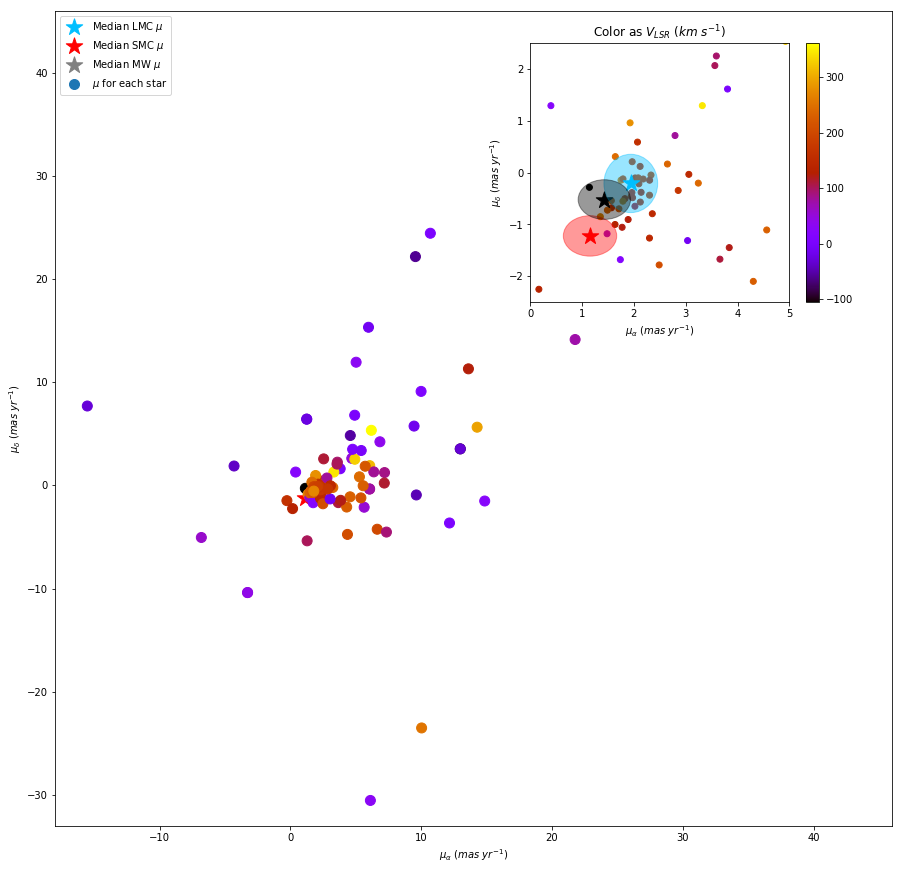

In [13]:
###########together plot
###Median plot with mad ellipses

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.colorbar import colorbar

lfact = 4.0
sfact = 4.0
gtfact = 1.0

outells  = [Ellipse(xy = (np.nanmedian(boutlra),np.nanmedian(boutldec)),width=mad(boutlra)*lfact,\
            height=mad(boutldec)*lfact,color='deepskyblue'), Ellipse(xy = (np.nanmedian(boutsra),\
            np.nanmedian(boutsdec)), width=mad(boutsra)*sfact,height=mad(boutsdec)*sfact,color='red'), \
            Ellipse(xy = (np.nanmedian(mpmra), np.nanmedian(mpmdec)), \
            width=mad(mpmra)*gtfact,height=mad(mpmdec)*gtfact, color='k',alpha =0.075)]

plt.figure(figsize=[15,15])
#a = plt.subplot(111, aspect='equal')

#for e in outells:
 #   e.set_clip_box(a.bbox)
  #  e.set_alpha(0.4)
   # a.add_artist(e)

plt.scatter(np.nanmedian(boutlra),np.nanmedian(boutldec),c='deepskyblue',marker='*', \
            s=300,label='Median LMC $\mu$')
plt.scatter(np.nanmedian(boutsra),np.nanmedian(boutsdec),c='red',marker='*',s=300, \
            label='Median SMC $\mu$')
plt.scatter(np.nanmedian(mpmra),np.nanmedian(mpmdec),c='grey',marker='*',s=300, \
            label='Median MW $\mu$')

plt.scatter(allra,alldec,c=allvlsr,s=100,cmap=plt.cm.get_cmap('gnuplot'), \
            alpha=1,label=r'$\mu$ for each star')

plt.xlabel(r'$\mu_{\alpha}$ $(mas$ $yr^{-1}$)')
plt.ylabel(r'$\mu_{\delta}$ $(mas$ $yr^{-1}$)')
plt.xlim(-18,46)
plt.ylim(-33,46)
plt.legend(loc='upper left')
sub_axes = plt.axes([.565, .58, .3, .3])
sub_axes.set_aspect('equal')
sub_axes.scatter(allra,alldec,c=allvlsr,cmap=plt.cm.get_cmap('gnuplot')) 
sub_axes.scatter(np.nanmedian(boutlra),np.nanmedian(boutldec),c='deepskyblue',marker='*', \
            s=300,label='Median LMC $\mu$')
sub_axes.scatter(np.nanmedian(boutsra),np.nanmedian(boutsdec),c='red',marker='*',s=300, \
            label='Median SMC $\mu$')
sub_axes.scatter(np.nanmedian(mpmra),np.nanmedian(mpmdec),c='k',marker='*',s=300, \
            label='Median MW $\mu$', alpha=1.0)
sub_axes.set_title(r'Color as $V_{LSR}$ $(km$ $s^{-1}$)')
sub_axes.set_xlabel(r'$\mu_{\alpha}$ $(mas$ $yr^{-1}$)')
sub_axes.set_ylabel(r'$\mu_{\delta}$ $(mas$ $yr^{-1}$)')
sub_axes.set_xlim(-0,5)
sub_axes.set_ylim(-2.5,2.5)
plt.colorbar(shrink=0.8)

for e in outells:
    e.set_clip_box(sub_axes.bbox)
    e.set_alpha(0.4)
    sub_axes.add_artist(e)

plt.savefig('AAS_pmspace.pdf',bbox_inches='tight')
plt.show()

In [14]:
min(allra)

-15.528911294505495

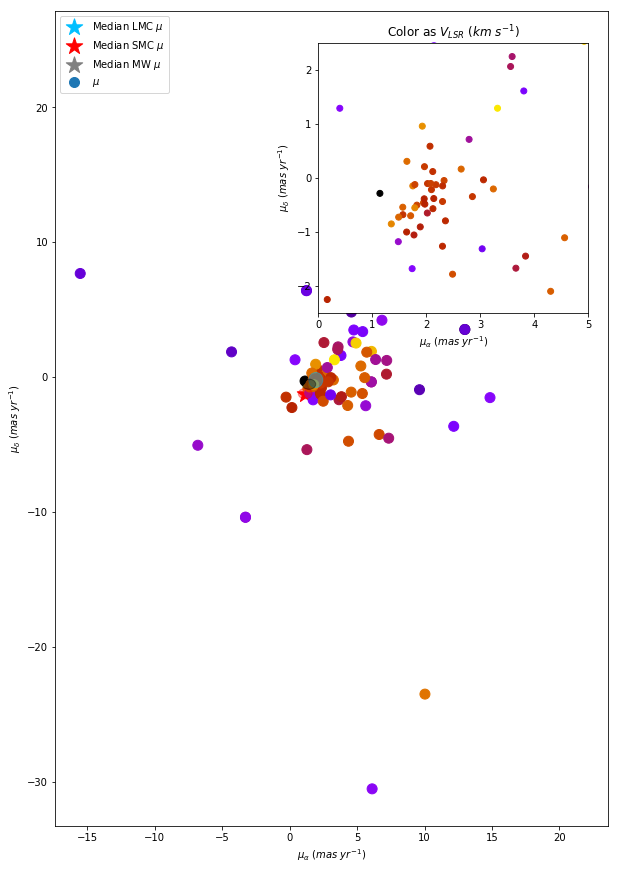

In [15]:
###########together plot
###Median plot with mad ellipses
lfact = 4.0
sfact = 4.0
gtfact = 1.0

outells  = [Ellipse(xy = (np.nanmedian(boutlra),np.nanmedian(boutldec)),width=mad(boutlra)*lfact,\
            height=mad(boutldec)*lfact,color='deepskyblue'), Ellipse(xy = (np.nanmedian(boutsra),\
            np.nanmedian(boutsdec)), width=mad(boutsra)*sfact,height=mad(boutsdec)*sfact,color='red'), \
            Ellipse(xy = (np.nanmedian(mpmra), np.nanmedian(mpmdec)), \
            width=mad(mpmra)*gtfact,height=mad(mpmdec)*gtfact, color='k',alpha =0.075)]

plt.figure(figsize=[15,15])
a = plt.subplot(111, aspect='equal')

for e in outells:
    e.set_clip_box(a.bbox)
    e.set_alpha(0.4)
    a.add_artist(e)

a.scatter(np.nanmedian(boutlra),np.nanmedian(boutldec),c='deepskyblue',marker='*', \
            s=300,label='Median LMC $\mu$')
a.scatter(np.nanmedian(boutsra),np.nanmedian(boutsdec),c='red',marker='*',s=300, \
            label='Median SMC $\mu$')
a.scatter(np.nanmedian(mpmra),np.nanmedian(mpmdec),c='grey',marker='*',s=300, \
            label='Median MW $\mu$')

a.scatter(allra,alldec,c=allvlsr,s=100,cmap=plt.cm.get_cmap('gnuplot'), \
            alpha=1,label=r'$\mu$')

plt.xlabel(r'$\mu_{\alpha}$ $(mas$ $yr^{-1}$)')
plt.ylabel(r'$\mu_{\delta}$ $(mas$ $yr^{-1}$)')
#plt.xlim(-7.5,10.5)
#plt.ylim(-6,10)
#plt.title('B Stars Proper Motion Space')
#a.colorbar()
#plt.title(r'Color as $V_{LSR}$ $(km$ $s^{-1}$)')
plt.legend(loc='upper left')
sub_axes = plt.axes([.5, .6, .25, .25])
sub_axes.scatter(allra,alldec,c=allvlsr,cmap=plt.cm.get_cmap('gnuplot')) 
sub_axes.set_title(r'Color as $V_{LSR}$ $(km$ $s^{-1}$)')
sub_axes.set_xlabel(r'$\mu_{\alpha}$ $(mas$ $yr^{-1}$)')
sub_axes.set_ylabel(r'$\mu_{\delta}$ $(mas$ $yr^{-1}$)')
sub_axes.set_xlim(-0,5)
sub_axes.set_ylim(-2.5,2.5)
#plt.savefig('AAS_icrbstars.pdf',bbox_inches='tight')
plt.show()

In [16]:
#get distances from parallax
bdist = []
bdist_err = []
ddist = []
ddist_err = []

for i in range(len(bpure)):
    if (bpure['parallax_over_error'][i] >= 3 and bpure['parallax'][i] > 0):
        bdist.append(bpure['parallax'][i]**(-1))
        bdist_err.append(np.reciprocal(bpure['parallax'][i]**2)*bpure['parallax_error'][i])
    else:
        bdist.append(13)
        bdist_err.append(13/3)
        
for i in range(len(dpure)):
    if (dpure['parallax_over_error'][i] >= 3 and dpure['parallax'][i] > 0):
        ddist.append(dpure['parallax'][i]**(-1))
        ddist_err.append(np.reciprocal(dpure['parallax'][i]**2)*dpure['parallax_error'][i])
    else:
        ddist.append(13)
        ddist_err.append(13/3)
        
bpure['distance'] = Column(bdist, unit='kpc',description='distance')
bpure['distance_err'] = Column(bdist_err, unit='kpc',description='distance error')
bpure['where'] = Column(1)
dpure['distance'] = Column(ddist, unit='kpc',description='distance')
dpure['distance_err'] = Column(ddist_err, unit='kpc',description='distance')
dpure['where'] = Column(2)

#combine tables
monarch=vstack([bpure,dpure])
monarch.show_in_browser(jsviewer=True)

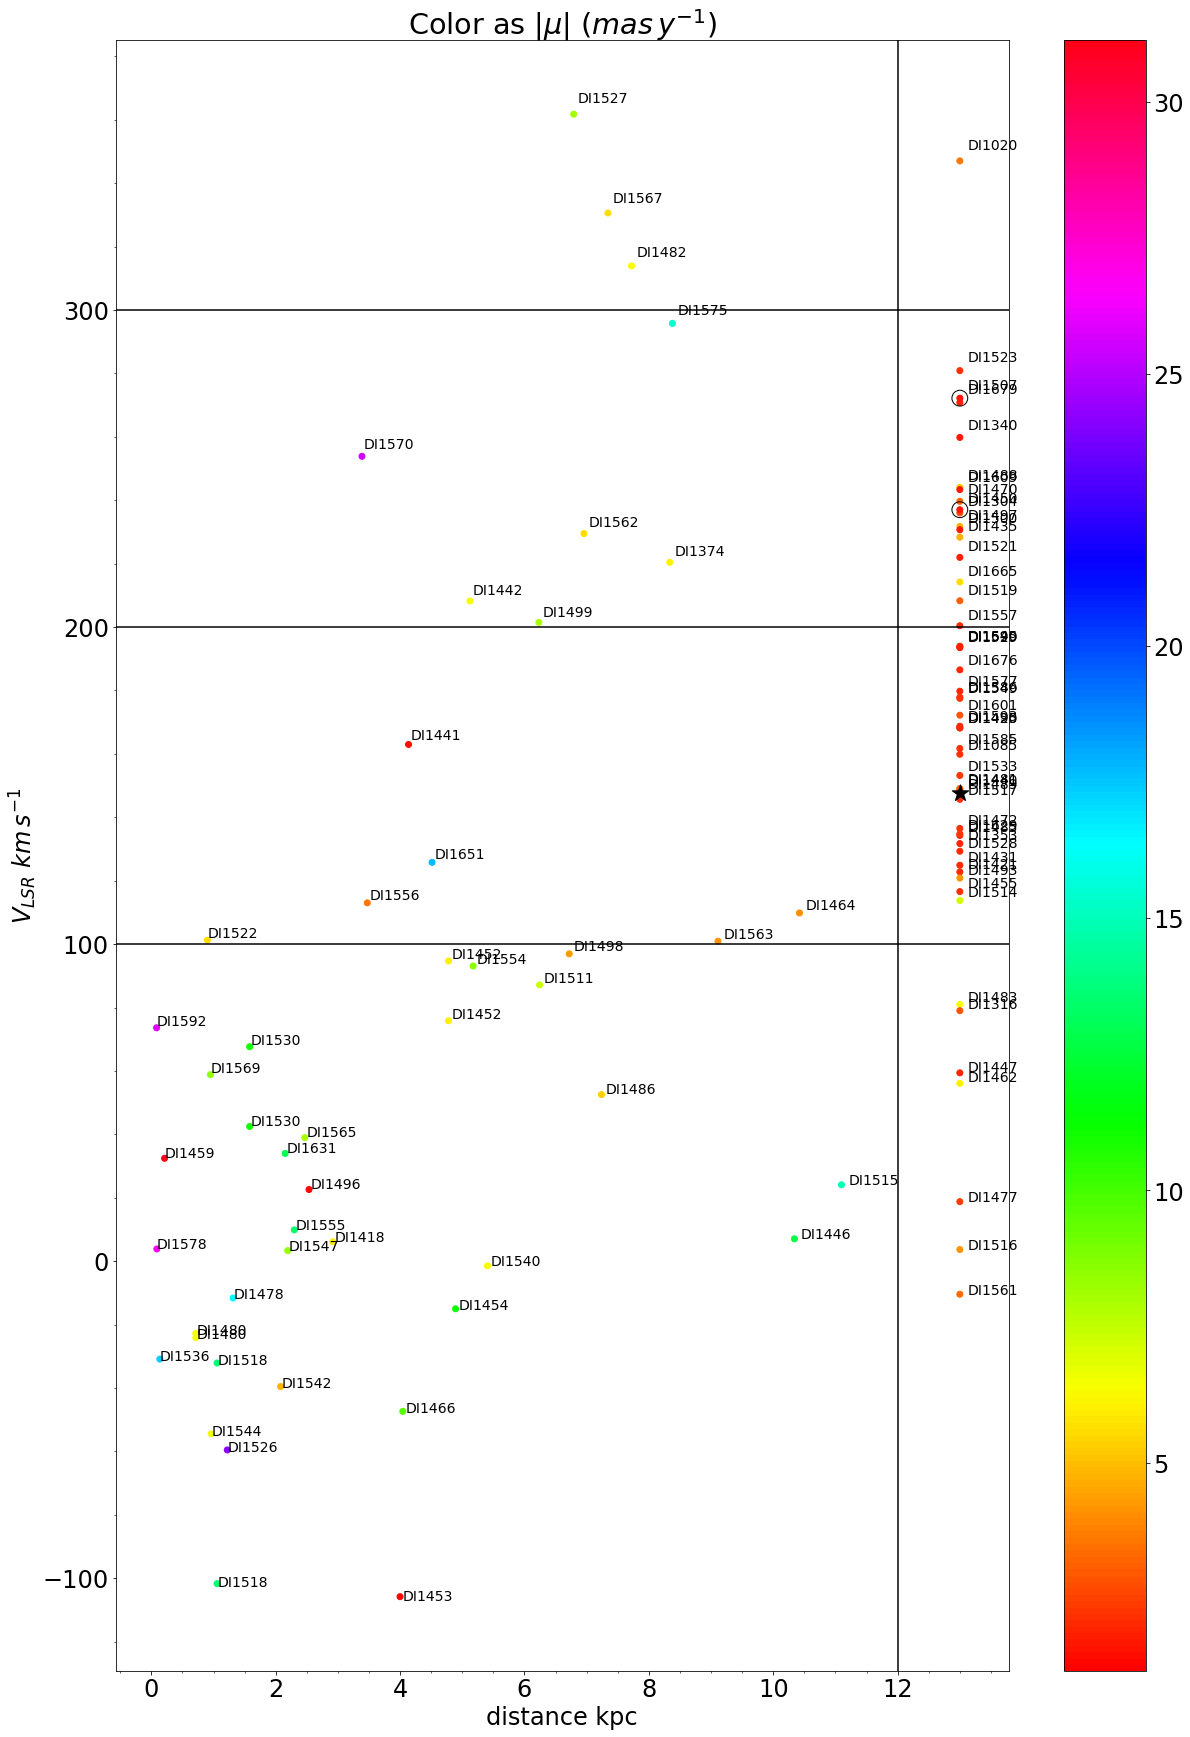

In [121]:
#plt.scatter(cpos,cvel,facecolors='none',edgecolors='r',s=250,label='YMSC')
y1 = np.where(monarch['NAME'] == 'DI1450')
y2 = np.where(monarch['NAME'] == 'DI1507')
ymsc = vstack([monarch[y1],monarch[y2]])
star = np.where(monarch['NAME']== 'DI1489')
spef = monarch[star]

plt.figure(figsize=[20,30])
plt.scatter(monarch['distance'],monarch['VLSR'],c=np.sqrt(np.square(monarch['pmra'])+np.square(monarch['pmdec']))\
           ,cmap='hsv')
plt.colorbar()
plt.scatter(ymsc['distance'],ymsc['VLSR'],facecolors='none',edgecolors='k',s=250,label='YMSC')
plt.scatter(spef['distance'],spef['VLSR'],c='k',s=300,marker='*')
plt.axhline(200,c='k')
plt.axhline(300,c='k')
plt.axhline(100,c='k')
plt.axvline(12,c='k')
plt.minorticks_on()
plt.xlabel(r'distance' + ' ' + r'kpc')
plt.ylabel(r'$V_{LSR}$' + ' ' + r'$km\, s^{-1}$')
for i in range(len(monarch)):
    plt.text(monarch['distance'][i]*(1+0.01),monarch['VLSR'][i]*(1+0.01),monarch['NAME'][i],fontsize=14)

plt.title(r'Color as |$\mu$|' + ' ' + r'$(mas\, y^{-1})$')
#plt.savefig('veldistprop.pdf',bbox_inches='tight')
plt.show()

In [18]:
vels = np.where((monarch['VLSR']>=100) & (monarch['VLSR']<=200) & (monarch['distance']>=12))
consort = monarch[vels]
consort['NAME'].data

masked_BaseColumn(data=['DI1455', 'DI1514', 'DI1577', 'DI1595', 'DI1085',
                        'DI1353', 'DI1421', 'DI1425', 'DI1431', 'DI1440',
                        'DI1472', 'DI1481', 'DI1485', 'DI1489', 'DI1490',
                        'DI1493', 'DI1517', 'DI1528', 'DI1529', 'DI1533',
                        'DI1549', 'DI1585', 'DI1586', 'DI1593', 'DI1601',
                        'DI1629', 'DI1640', 'DI1676'],
                  mask=[False, False, False, False, False, False, False,
                        False, False, False, False, False, False, False,
                        False, False, False, False, False, False, False,
                        False, False, False, False, False, False, False],
            fill_value='N/A',
                 dtype='<U6')

In [19]:
min(monarch['parallax'])+0.03

-0.18761715250863656

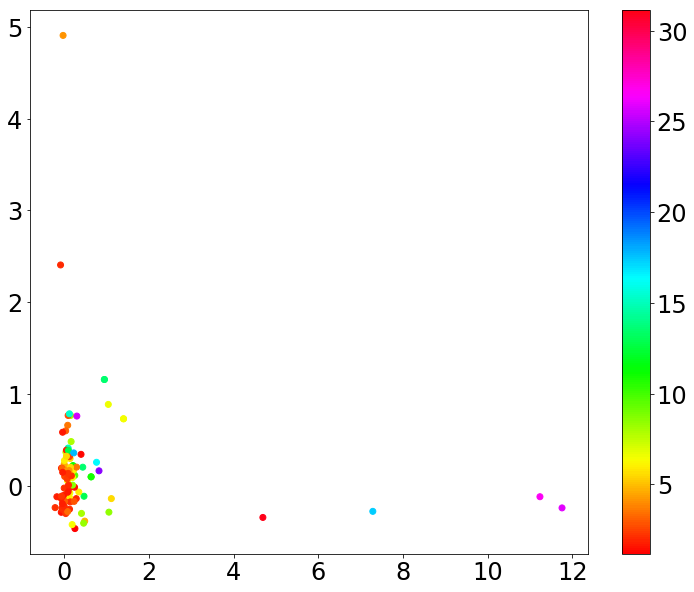

In [90]:
plt.figure(figsize=[12.5,10])
plt.scatter(monarch['parallax'],monarch['bp_rp'], c=np.sqrt(np.square(monarch['pmra'])+np.square(monarch['pmdec']))\
           ,cmap='hsv')
plt.colorbar()

In [21]:
list_duplicates(monarch['NAME'])

['DI1452', 'DI1530', 'DI1518', 'DI1480']

In [124]:
monarch.write('/Users/joshpovick/Desktop/Research/MS_young/monarch.dat',format='ascii',overwrite=True)
monarch.write('/Users/joshpovick/Desktop/Research/MS_young/monarch.fits',format='fits',overwrite=True)
#must delete header to use for gaia search

In [122]:
bay = fits.getdata('/Users/joshpovick/Desktop/Research/MS_young/monarchdist-result.fits',1)
monarch['r_est'] = bay['r_est']
monarch['r_lo'] = bay['r_lo']
monarch['r_hi'] = bay['r_hi']
monarch['r_len'] = bay['r_len']
monarch['result_flag'] = bay['result_flag']
monarch['modality_flag'] = bay['modality_flag']

close = np.where(monarch['parallax_over_error'] >= 3)
close_monarch = monarch[close]
close_monarch['inv_parallax'] = np.reciprocal(close_monarch['parallax']+0.052)

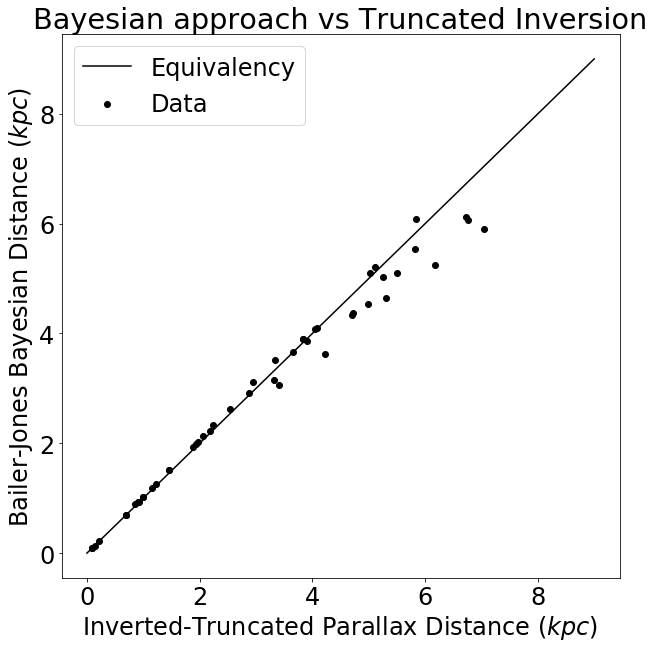

In [123]:
#Comparison of Bailer-Jones and naive truncated inverted 

bayparadist = range(10)
plt.figure(figsize=[10,10])
plt.plot(bayparadist,bayparadist,c='k',label='Equivalency')
plt.scatter(close_monarch['inv_parallax'],close_monarch['r_est']/1000,c='k',label='Data')
plt.xlabel(r'Inverted-Truncated Parallax Distance $(kpc)$')
plt.ylabel(r'Bailer-Jones Bayesian Distance $(kpc)$')
plt.legend()
plt.title('Bayesian approach vs Truncated Inversion')
plt.show()

In [102]:
huh = np.where(monarch['NAME']=='DI1488')
test = monarch[huh]
print(test['r_est']/1000)
print(close_monarch['inv_parallax'][huh])

     r_est      
----------------
5.00593804287227
   inv_parallax   
------------------
6.2314221868073645
